In [ ]:
import numpy as np
import pandas as pd

Carregando o conjunto de dados em um quadro de dados utilizando Pandas

In [3]:
df=pd.read_csv('agricultural_raw_material.csv')

Explorando os conjuntos de dados

In [5]:
df.info
#Checking Null Values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

Lidar com dados ausentes, incorretos e inválidos

In [6]:
# Replacing %, "," and "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
# Dropping rows with NaN values
df = df.dropna()
# Check to see if all NaN values are resolved
df.isnull().sum()
# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton Price", "Cotton price % Change", "Fine wool Price", "Fine wool price % Change", "Hard log Price", "Hard log price % Change", "Hard sawnwood Price", "Hard sawnwood price % Change", "Hide Price", "Hide price % change", "Plywood Price", "Plywood price % Change", "Rubber Price", "Rubber price % Change", "Softlog Price", "Softlog price % Change", "Soft sawnwood Price", "Soft sawnwood price % Change", "Wood pulp Price", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [7]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


# Colunas de data e hora
formatando a coluna datetime e definindo-a como índice para o conjunto de dados



In [9]:
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('Month')

Análise Exploratória e Visualização. Vamos começar importando **matplotlib.pyplot e seaborn**

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Filtrando os dados apenas para o preço do algodão

In [19]:
df_algodao = df[['Cotton price % Change']]

Gerando o gráfico

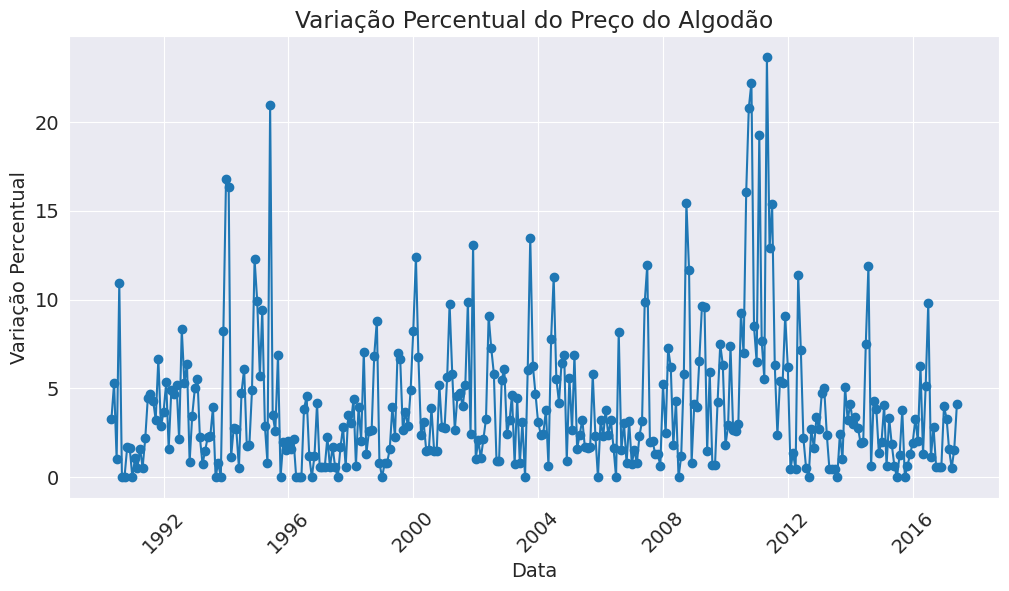

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df_algodao.index, df_algodao['Cotton price % Change'], marker='o', linestyle='-')
plt.title('Variação Percentual do Preço do Algodão')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

O eixo x representa o tempo e o eixo y representa a variação percentual do preço do algodão.

* Podemos observar as flutuações no preço do algodão ao longo do tempo.
* Se houver tendências específicas, como aumentos ou diminuições consistentes, elas serão evidentes no gráfico.
* Podemos identificar períodos de estabilidade de preços e períodos de volatilidade.

# Filtrando os dados para as colunas de interesse
Vamos criar um gráfico para visualizar a composição desses preços ao longo dos anos.

In [30]:
df_precos = df[['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Rubber Price']]

In [31]:
df_media_anual = df_precos.resample('Y').mean()

Gerando o gráfico

<Figure size 1200x600 with 0 Axes>

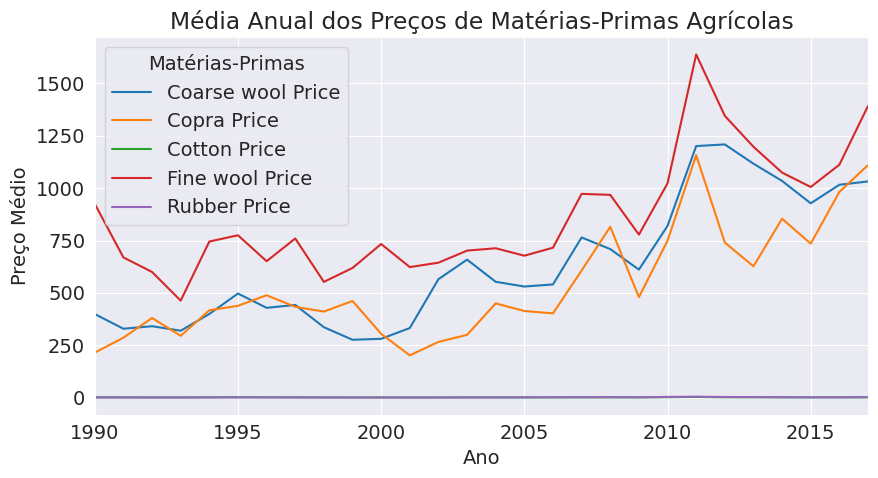

In [32]:
plt.figure(figsize=(12, 6))
df_media_anual.plot(kind='line')
plt.title('Média Anual dos Preços de Matérias-Primas Agrícolas')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.legend(title='Matérias-Primas')
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico mostra a média anual dos preços de várias matérias-primas agrícolas ao longo do período de análise. Cada linha representa uma matéria-prima específica, incluindo lã bruta, copra, algodão, lã fina e borracha. Os dados foram calculados a partir de preços históricos e representam uma média anual para cada matéria-prima ao longo dos anos.

A análise revela tendências de longo prazo nos preços das matérias-primas agrícolas, destacando períodos de aumento, estabilidade e queda nos preços ao longo do período analisado. Essas informações podem ser úteis para compreender a dinâmica do mercado de commodities agrícolas e auxiliar na tomada de decisões relacionadas a investimentos, produção e comércio.

# Filtrando os dados para as colunas de variação percentual de preços de matéria-prima agrícola ao longo dos anos

In [35]:
df_variacao_percentual = df[['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change', 'Rubber price % Change']]

Calculando a média anual das variações percentuais dos preços das matérias-primas agrícolas

In [36]:
df_variacao_percentual_media_anual = df_variacao_percentual.resample('Y').mean()

Gerando o gráfico

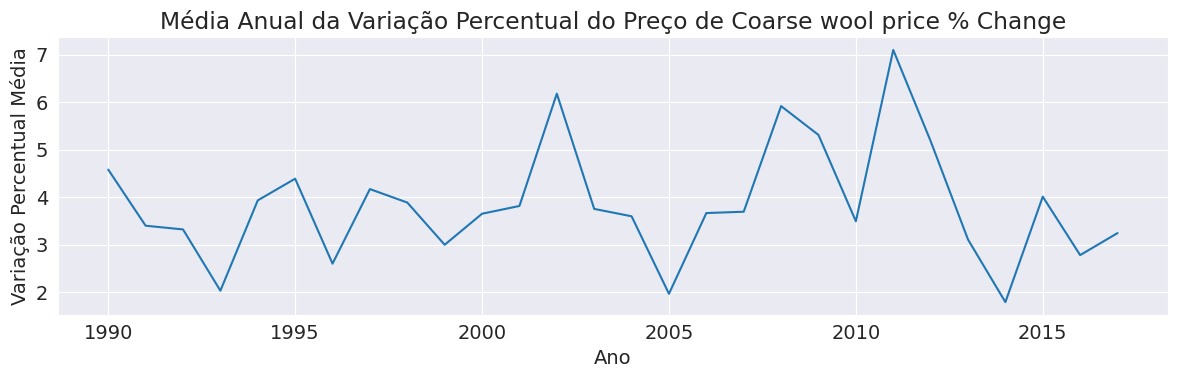

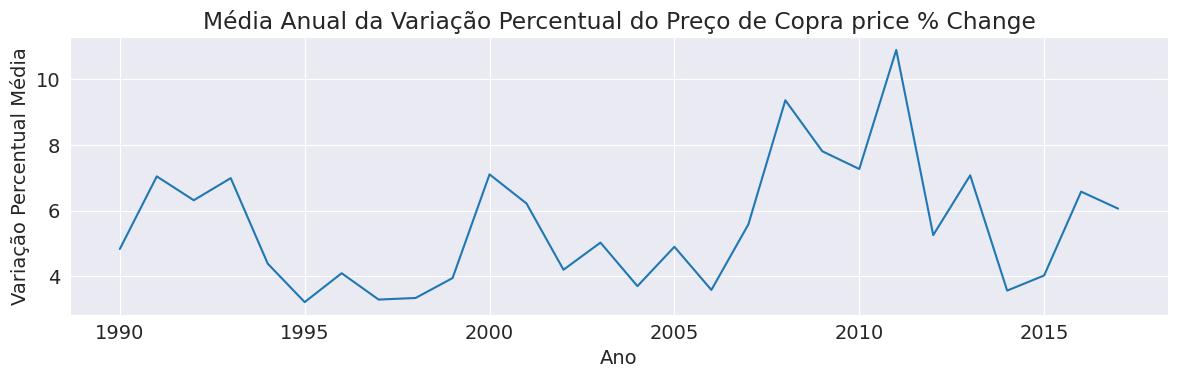

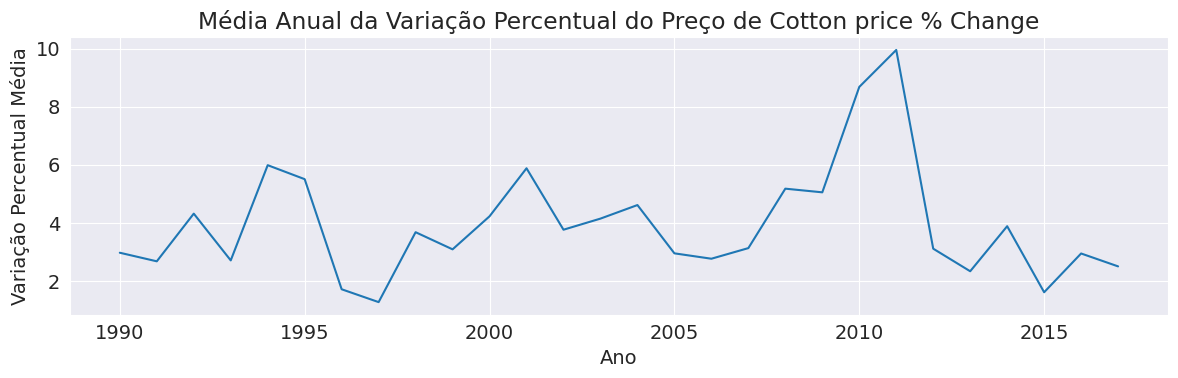

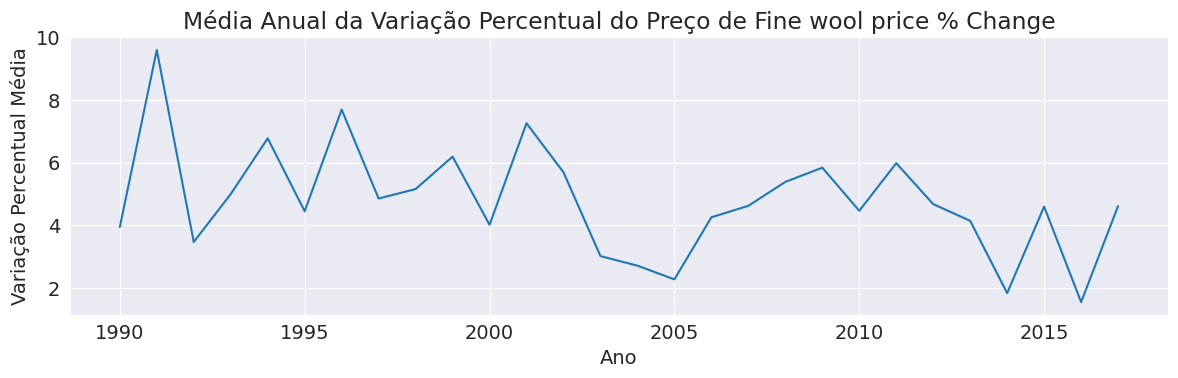

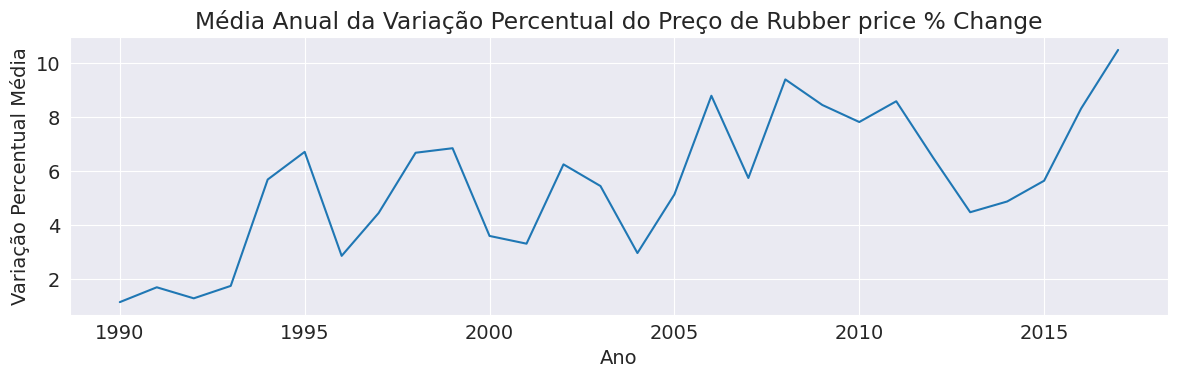

In [38]:
for coluna in df_variacao_percentual_media_anual.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df_variacao_percentual_media_anual.index.year, df_variacao_percentual_media_anual[coluna])
    plt.title(f'Média Anual da Variação Percentual do Preço de {coluna}')
    plt.xlabel('Ano')
    plt.ylabel('Variação Percentual Média')
    plt.grid(True)
    plt.tight_layout()
    plt.show()